## Сгенерируем датасет из sklearn. Далее напишем функции для KMeans++ с критерием останова

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from sklearn.datasets import make_blobs

In [124]:
X, y = make_blobs (n_samples = 100, random_state = 10)

In [125]:
y

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0])

In [7]:
plt.figure(figsize = (7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

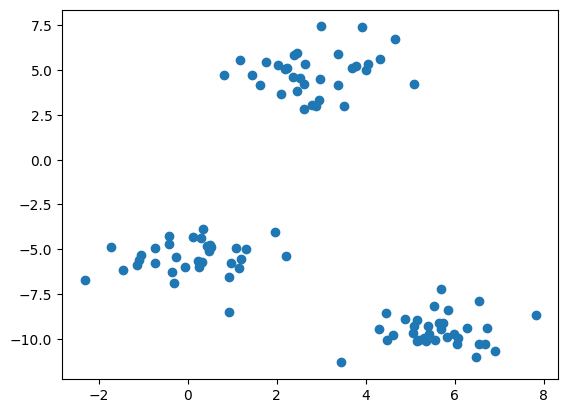

In [8]:
plt.scatter(X[ : ,0], X[ : ,1])

In [9]:
plt.scatter?

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    The linewidth 

### Рандомим первую центроиду, оставшиеся центроиды будут на максимальном расстоянии от всех предыдущих.

In [12]:
def kmeanspp(X, k=3, seed=0):
    
    centroids = []
    
    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())
        
        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

    return centroids

In [39]:
centroids = kmeanspp(X, k = 3);

In [14]:
centroids

[array([4.05619693, 5.32231077]),
 array([  3.44868458, -11.32833331]),
 array([-1.74093095, -4.89176978])]

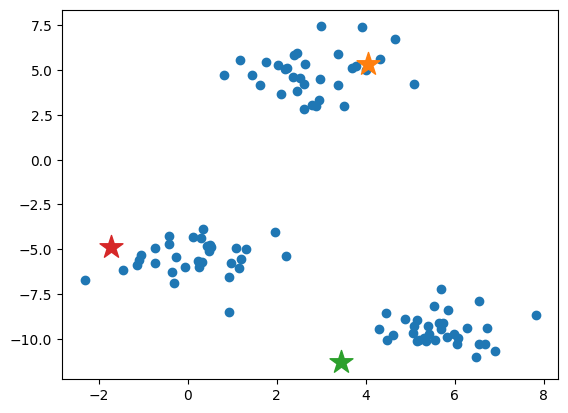

In [43]:
plt.scatter(X[ : ,0], X[ : ,1])

for k in range(len(centroids)):
    plt.scatter(centroids[k][ 0], centroids[k][ 1], marker='*', s=300)



In [45]:
centroids = kmeanspp(X, k = 3, seed = 1);

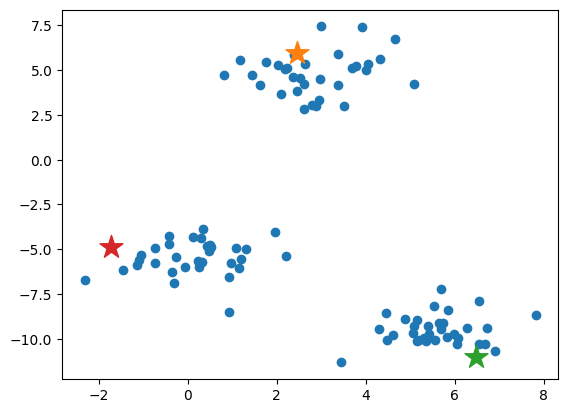

In [46]:
plt.scatter(X[ : ,0], X[ : ,1])

for k in range(len(centroids)):
    plt.scatter(centroids[k][ 0], centroids[k][ 1], marker='*', s=300)


## В зависимости от семечки (seed) - разные центроиды. Это плохо. Проверим имплементацию в библиотеке sckitit

In [54]:
from sklearn.cluster import kmeans_plusplus

In [59]:
centorids_pp, centroids_ids = kmeans_plusplus(X, n_clusters = 3, random_state = 0)

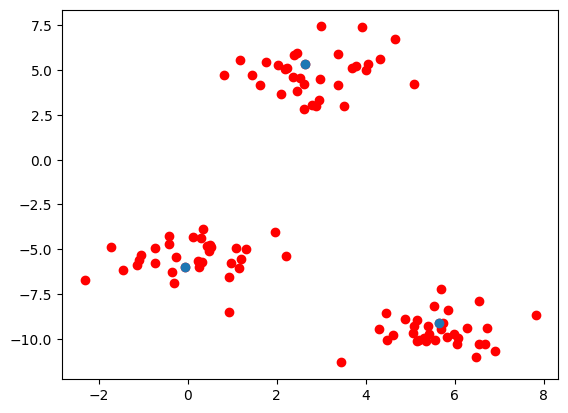

In [65]:
plt.scatter(X[ : ,0], X[ : ,1], color = 'red')
plt.scatter(X[centroids_ids, 0], X[centroids_ids,1])

## Наща функция, которая находит центроиды по алгоритму kmeanspp и имеет критерий останова (дефолтный эпсилон = 10^(-4))

In [66]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        centroids = kmeanspp(X, k=k, seed=seed)

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)    
        
        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [71]:
centroids_s, clusters_s = KMeans(X)

stopping at iter 2


In [119]:
cl_list = list(clusters_s.values())

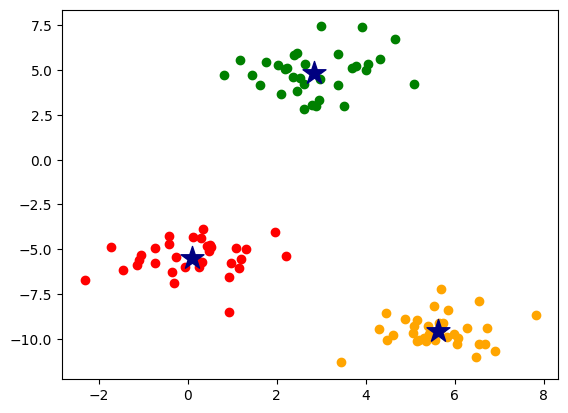

In [123]:
colors = ['green', 'orange', 'red', 'navy', 'pink', 'yellow', 'black']
for k in range(len(centroids_s)):
    for j in range(len(cl_list[k])):
        plt.scatter(cl_list[k][j][0], cl_list[k][j][1], color = colors[k])
    plt.scatter(centroids_s[k][0], centroids_s[k][1], color = 'navy', marker='*', s=300)

In [121]:
centroids_s

array([[ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499],
       [ 0.08921213, -5.46441742]])

## Ну и наконец еще раз посмотрим что можно сделать с klearn.cluster

In [129]:
from sklearn.cluster import KMeans as sk_KMeans

In [130]:
ds, y = make_blobs(n_samples = 100, random_state = 19)

In [131]:
model = sk_KMeans( n_clusters = 3, init='k-means++',
                  max_iter=10,
                  random_state=0)

In [135]:
model.fit(ds)

C:\Users\User1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=10, n_clusters=3, random_state=0)

In [136]:
model.labels_

array([1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1,
       1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1,
       2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0])

In [140]:
labels = model.predict(ds)

In [141]:
labels[:]

array([1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1,
       1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1,
       2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0])

In [142]:
labels == model.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [143]:
model.cluster_centers_

array([[-3.39341115, -8.79881934],
       [-7.90352005,  5.26667161],
       [-5.22283316, -7.28309069]])

In [145]:
model.inertia_

158.79427469009588

In [146]:
len(labels)

100

In [147]:
enumerate(model.cluster_centers_)

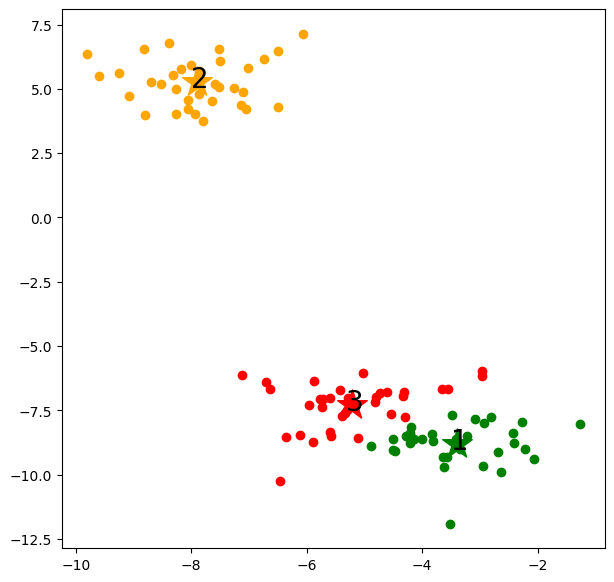

In [148]:
plt.figure(figsize=(7, 7))

for i in range(len(labels)):
    plt.scatter(ds[i, 0], ds[i, 1], color=colors[labels[i]])

for i, centr in enumerate(model.cluster_centers_):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);